  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/c4/64/7d344cfcef5efddf9cf32f59af7f855828e9d74b5f862eddf5bfd9f25323/geopandas-1.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for pyogrio>=0.7.2 from https://files.pythonhosted.org/packages/9d/66/ddb1c74c06c858ddbe889c68fea177d1d9c711af553d355417bdef8eaf17/pyogrio-0.9.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/79/95/eb68113c5b5737c342bde1bab92705dabe69c16299c5a122616e50f1fbd6/pyproj-3.6.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for shapely>=2.0.0 from https://files.pythonhosted.org/packages/ec/1b/092fff53cbeced411eed2717592e31cadd3e52f0ebaba5f2df3f34913f96/shapely-2.0.5-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   --------------- ------------------------ 122.9/323.6 kB 3.6 MB/s eta 0:00:01
   

C:\Users\A\AppData\Local\Temp\ipykernel_18996\4283006473.py:19: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("NSSO68.csv")


Dataset Information:

Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)
        slno                                 grp  Round_Centre  FSU_number  \
38447  38448  49399999999999997210535779106816.0             1       49410   
38448  38449  49399999999999997210535779106816.0             1       49410   
38449  38450  49399999999999997210535779106816.0             1       49410   
38450  38451  49399999999999997210535779106816.0             1       49410   
38451  38452  49399999999999997210535779106816.0             1       49410   

       Round  Schedule_Number  Sample  Sector  state  State_Region  ...  \
38447     68               10       1       2      2            22  ...   
38448     68   

C:\Users\A\AppData\Local\Temp\ipykernel_18996\4283006473.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hpnew['Meals_At_Home'].fillna(hpnew['Meals_At_Home'].mean(), inplace=True)


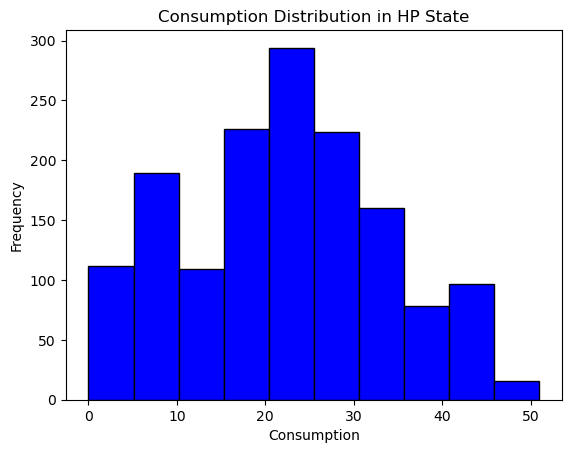

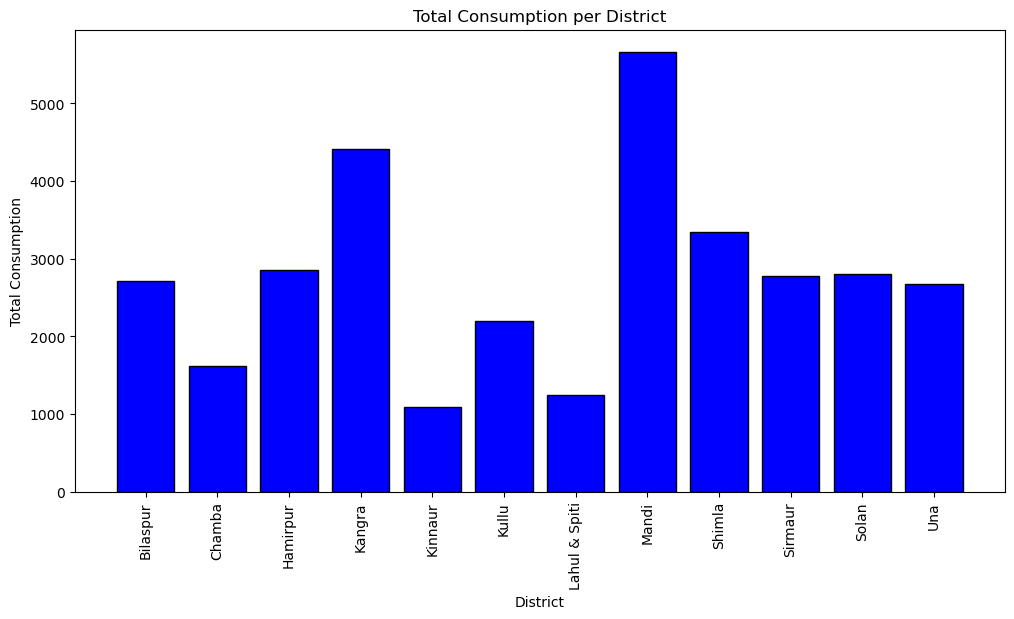

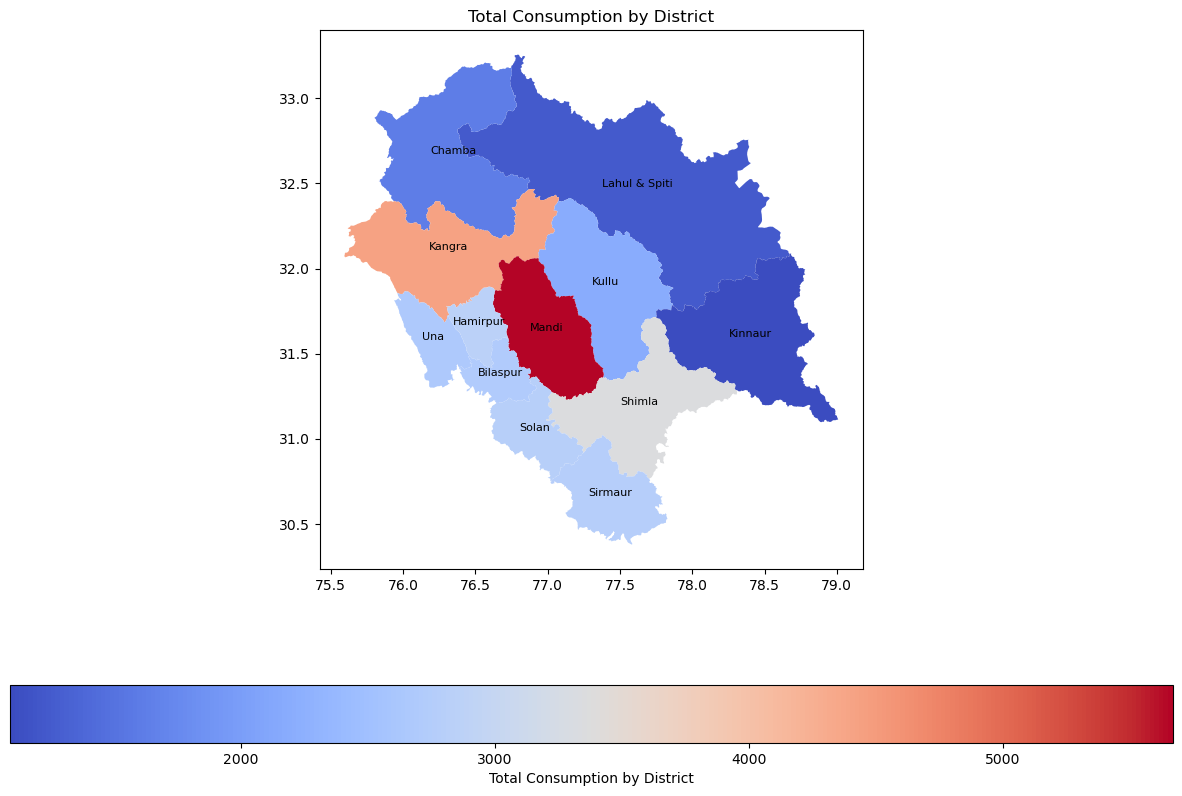

In [5]:
# Install required libraries
!pip install pandas numpy matplotlib scipy geopandas

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from scipy import stats

# Set working directory
os.chdir('D:\\SCMA632__FIRE632\\Stats\\Assignment\\A5 Arvind')
print(os.getcwd())

# Function to install and load libraries (not needed in Python as we import directly)
# Load required libraries (already imported at the beginning)

# Reading the file into Python
data = pd.read_csv("NSSO68.csv")

# Filtering for UP
df = data[data['state_1'] == 'HP']

# Display dataset info
print("Dataset Information:\n")
print(df.columns)
print(df.head())
print(df.shape)

# Finding missing values
missing_info = df.isnull().sum()
print("Missing Values Information:\n")
print(missing_info)

# Subsetting the data
hpnew = df[['state_1', 'District', 'Region', 'Sector', 'State_Region', 'Meals_At_Home', 'ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q', 'No_of_Meals_per_day']]

# Impute missing values with mean for specific columns
hpnew['Meals_At_Home'].fillna(hpnew['Meals_At_Home'].mean(), inplace=True)

# Finding outliers and removing them
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_threshold) & (df[column_name] <= upper_threshold)]

outlier_columns = ['ricepds_v', 'chicken_q']
for col in outlier_columns:
    hpnew = remove_outliers(hpnew, col)

# Summarize consumption
hpnew['total_consumption'] = hpnew[['ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q']].sum(axis=1)

# Summarize and display top consuming districts and regions
def summarize_consumption(df, group_col):
    summary = df.groupby(group_col)['total_consumption'].sum().reset_index()
    summary = summary.sort_values(by='total_consumption', ascending=False)
    return summary

district_summary = summarize_consumption(hpnew, 'District')
region_summary = summarize_consumption(hpnew, 'Region')

print("Top Consuming Districts:\n")
print(district_summary.head(4))
print("Region Consumption Summary:\n")
print(region_summary)

# Rename districts and sectors
district_mapping_hp = {
    "1": "Chamba", "2": "Kangra", "3": "Lahul & Spiti", "4": "Kullu",
    "5": "Mandi", "6": "Hamirpur", "7": "Una", "8": "Bilaspur",
    "9": "Solan", "10": "Sirmaur", "11": "Shimla", "12": "Kinnaur"
}
sector_mapping = {"2": "URBAN", "1": "RURAL"}

hpnew['District'] = hpnew['District'].astype(str)
hpnew['Sector'] = hpnew['Sector'].astype(str)
hpnew['District'] = hpnew['District'].map(district_mapping_hp).fillna(hpnew['District'])
hpnew['Sector'] = hpnew['Sector'].map(sector_mapping).fillna(hpnew['Sector'])

print(hpnew.head())

# Plot histogram
plt.hist(hpnew['total_consumption'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.title('Consumption Distribution in HP State')
plt.show()

# Aggregate total consumption per district
HP_consumption = hpnew.groupby('District')['total_consumption'].sum().reset_index()

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(HP_consumption['District'], HP_consumption['total_consumption'], color='blue', edgecolor='black')
plt.xlabel('District')
plt.ylabel('Total Consumption')
plt.title('Total Consumption per District')
plt.xticks(rotation=90)
plt.show()

# Plot on the Karnataka state map using NSSO68.csv data
data_map = gpd.read_file("D:\\SCMA632__FIRE632\\Stats\\Assignment\\A5 Arvind\\HIMACHAL PRADESH_DISTRICTS.geojson")
data_map = data_map.rename(columns={'dtname': 'District'})
data_map_data = data_map.merge(HP_consumption, on='District')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
data_map_data.plot(column='total_consumption', ax=ax, legend=True,
                   legend_kwds={'label': "Total Consumption by District",
                                'orientation': "horizontal"},
                   cmap='coolwarm')
data_map_data.apply(lambda x: ax.annotate(text=x.District, xy=x.geometry.centroid.coords[0], ha='center', fontsize=8), axis=1)
plt.title("Total Consumption by District")
plt.show()
